In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

## Задача 1
Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы

### 1.1. Данные из прошлого дз

In [2]:
df = pd.read_csv('kc_house_data.csv', sep = ',', encoding='latin-1')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### 1.2 Изучите стоимости недвижимости

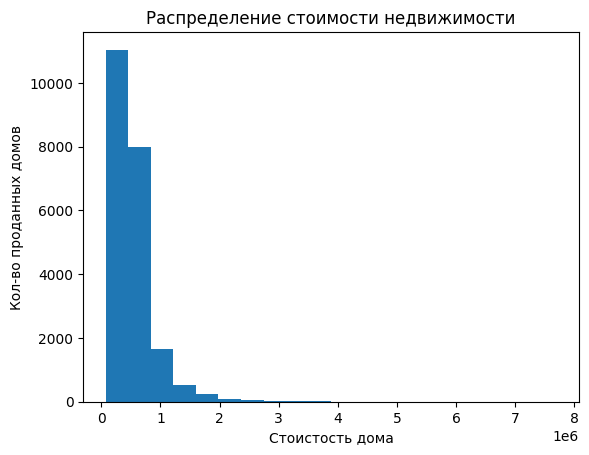

In [7]:
plt.hist(df['price'], bins = 20)
plt.xlabel('Стоистость дома')
plt.ylabel('Кол-во проданных домов')
plt.title('Распределение стоимости недвижимости');

Вывод: Большое количество продаж приходится на дома с низкой стоимостью.

### 1.3 Изучите распределение квадратуры жилой

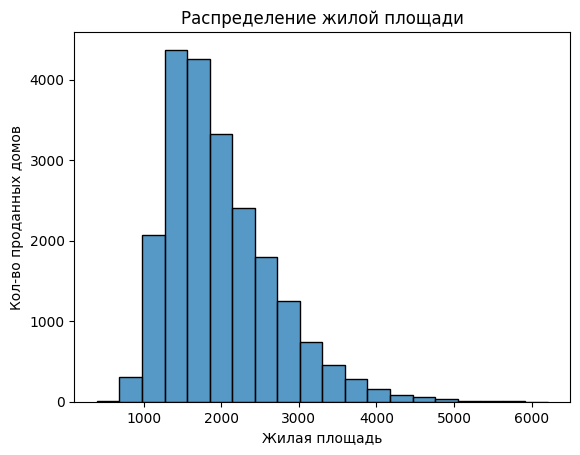

In [9]:
sns.histplot(df.sqft_living15, bins = 20)
plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Кол-во проданных домов');

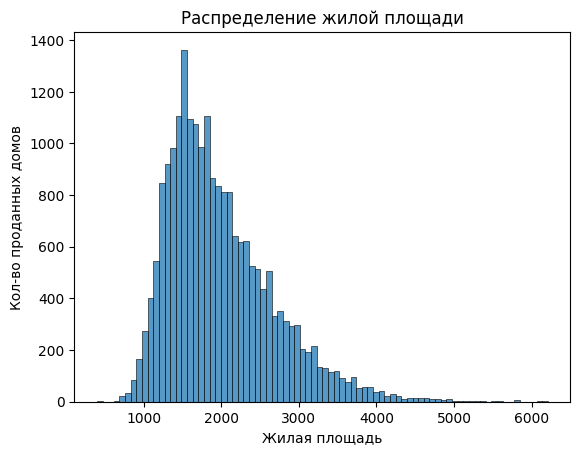

In [17]:
sns.histplot(df.sqft_living15, bins = 80)
plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Кол-во проданных домов');

Вывод: Наиболее продаваемые квартиры с жилой площадью примерно от 1300 до 1700 м.кв.

### 1.4 Изучите распределение года постройки

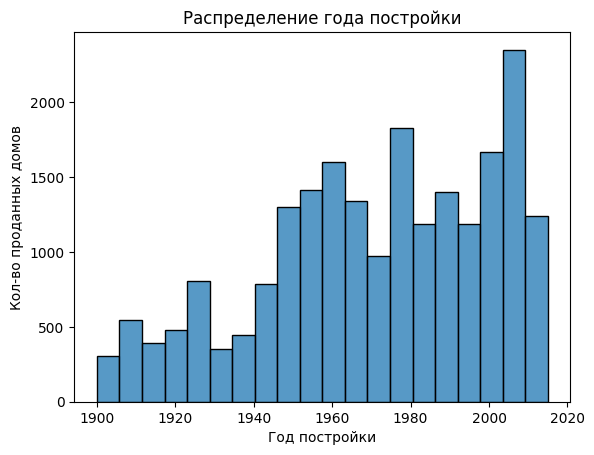

In [10]:
sns.histplot(df['yr_built'], bins = 20)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во проданных домов');

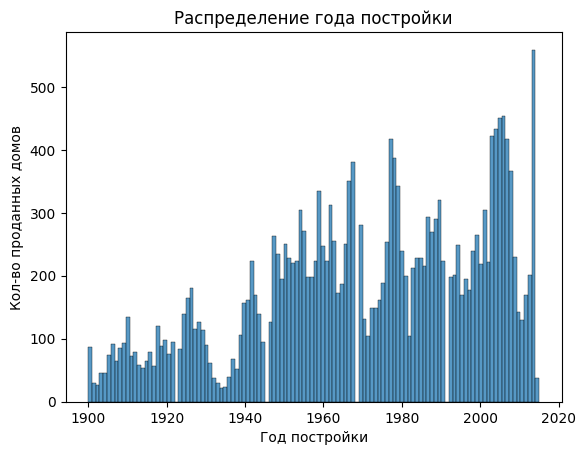

In [15]:
sns.histplot(df['yr_built'], bins = 120)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во проданных домов');

Вывод: Наиболее часто продаваемые дома - дома, построенные после 2000 года (в частности 2014 года).

## 2 задача

### 2.1 Изучите распределение домов от наличия вида на набережную

In [23]:
counts = df['waterfront'].value_counts()
counts.index = ['без вида на набережную', 'имеют вид на набережную']
counts

без вида на набережную     21450
имеют вид на набережную      163
Name: waterfront, dtype: int64

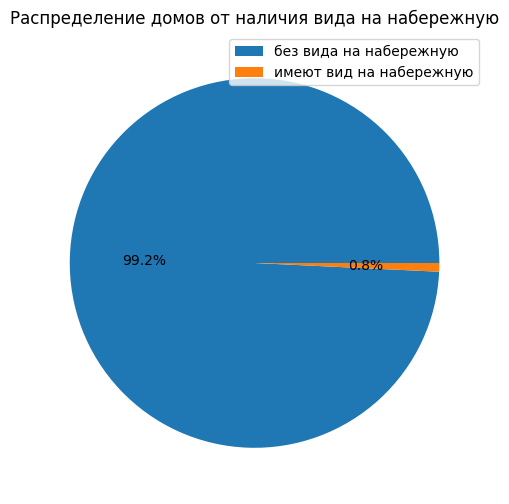

In [25]:
plt.figure(figsize=(15, 6))
plt.pie(counts, autopct='%1.1f%%')
plt.title('Распределение домов от наличия вида на набережную')
plt.legend(counts.index, loc='upper right', fontsize=10);

Вывод: Лишь 0.8% домов имеют вид на набережную.

### 2.2 Изучите распределение этажей домов

In [30]:
counts = df['floors'].value_counts()
counts

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

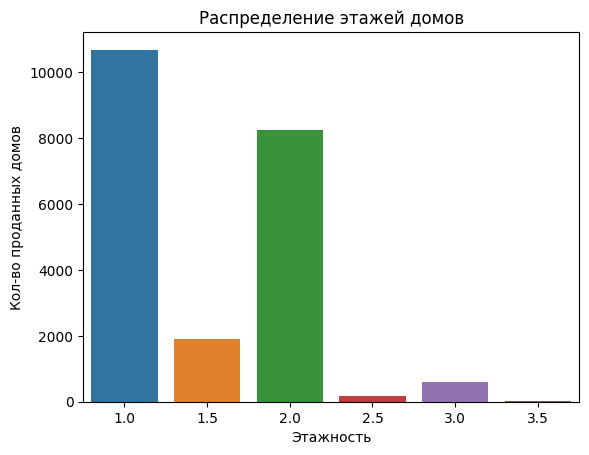

In [33]:
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel('Этажность')
plt.ylabel('Кол-во проданных домов')
plt.title('Распределение этажей домов');


Вывод: Наиболее часто продаваемые дома - одноэтажные, затем двухэтажные.

### 2.2 Изучите распределение состояния домов

In [34]:
counts = df['condition'].value_counts().sort_index()
counts

1       30
2      172
3    14031
4     5679
5     1701
Name: condition, dtype: int64

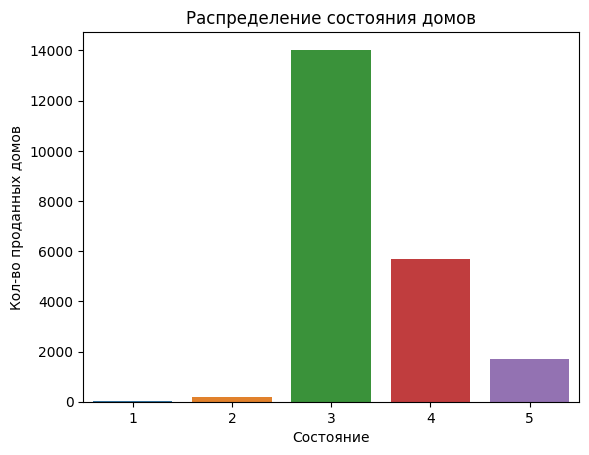

In [35]:
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel('Состояние')
plt.ylabel('Кол-во проданных домов')
plt.title('Распределение состояния домов');

Вывод: Наиболее продаваемые дома в состоянии №3.

## 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

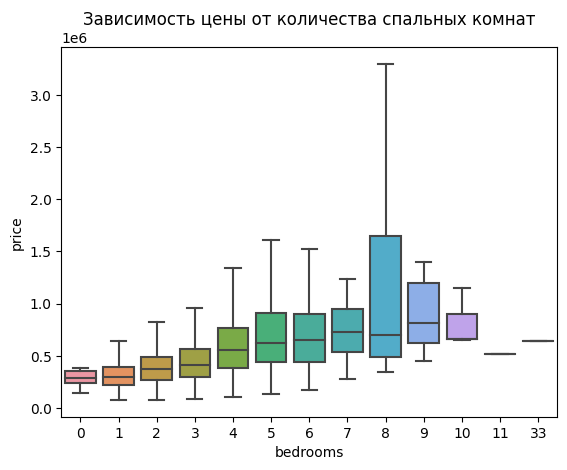

In [49]:
# влияние количества спальных комнат на стоимость недвижимости
sns.boxplot(x=df['bedrooms'], y=df['price'], showfliers = False)
plt.title('Зависимость цены от количества спальных комнат');

Вывод: Самый большой разброс в цене наблюдается у домов с 8 спальнями, при этом чем больше в доме спальных комнат, тем дом дороже.

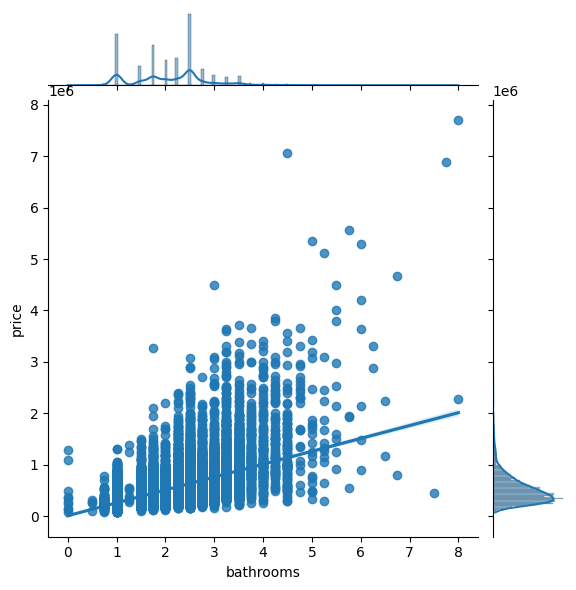

In [50]:
#влияние количества ванных комнат на стоимость недвижимости
sns.jointplot(x=df['bathrooms'], y=df['price'], kind='reg');

Вывод: прослеживается прямая зависимость между количеством ванных комнат и ценой дома(не учитывая выбросы).

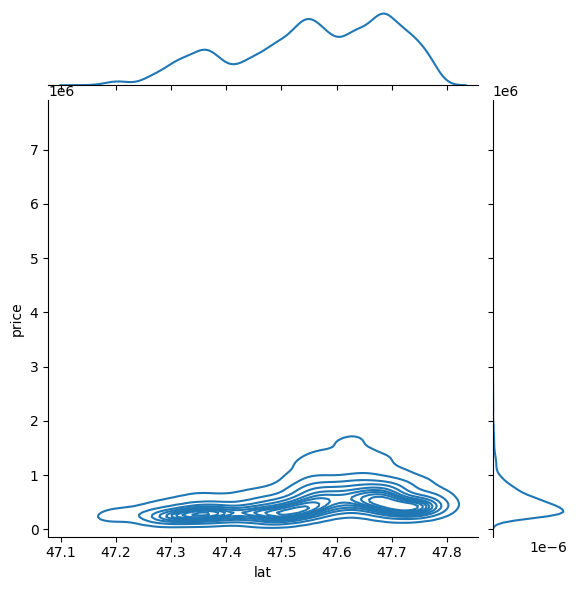

In [52]:
sns.jointplot(x = df['lat'], y = df['price'], kind = 'kde');

Вывод: Географическое положение также влияет на стоимость дома - стоимость начинает расти в диапазоне широты от 47.5 до 47.65, а потом с таким же темпом снижается в широте от 47.65 до 47.75



<Axes: xlabel='price', ylabel='sqft_living'>

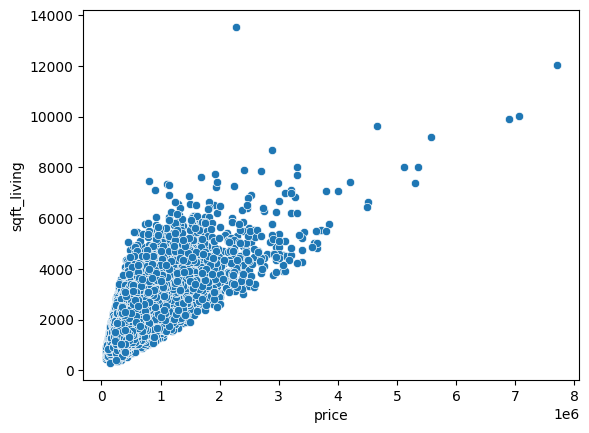

In [53]:
sns.scatterplot(x = df.price,y = df.sqft_living)


Вывод:  жилая площадь увеличивается с ростом цены, но в то же время можно сказать, что в начальной ценовой категории много домов как с маленькой, так и с большой площадью.